In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import os
import seaborn as sns

from matplotlib.colors import LogNorm

### Number of events recorded per year

In [2]:
storm_data = pd.read_csv("../Data/Prod_datasets/Storm_events_details_full_clean.csv")

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21188\1569508335.py:1: DtypeWarning: Columns (10,20,22,23,28,29,31,33,34,36,37,42,43,48) have mixed types. Specify dtype option on import or set low_memory=False.
  storm_data = pd.read_csv("../Data/Prod_datasets/Storm_events_details_full_clean.csv")


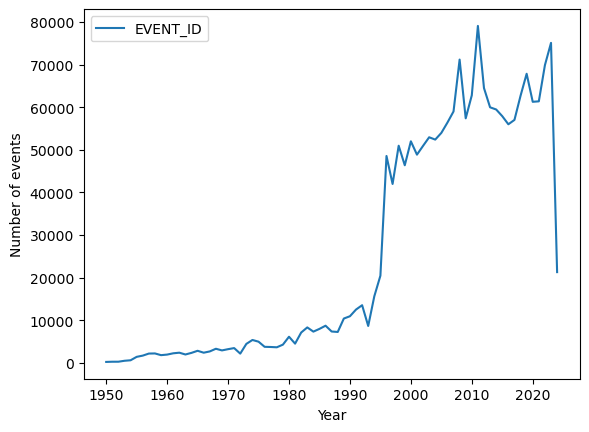

In [3]:
storm_data.groupby("YEAR").count().plot(y = "EVENT_ID")
plt.xlabel("Year")
plt.ylabel("Number of events");

In [4]:
storm_data.shape

(1891639, 58)

### Narrowing the categories of events

In [5]:
storm_data.columns

Index(['EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME',
       'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'BEGIN_DATE', 'END_DATE', 'DAMAGE_PROPERTY_ORIGINAL',
       'DAMAGE_CROPS_ORIGINAL', 'INFLATION_INDEX', 'US_FIPS', 'lat', 'long',
       'X_CART', 'Y_CART', 'DISCOUNT_DAMAGE_PROPERTY', 'DISCOUNT_DAMAGE_CROPS',
       'EVENT_CAT'],
      dtype='obj

In [6]:
## Creating a mapping table of the storm events

storm_events = storm_data["EVENT_TYPE"].unique()
storm_events.sort()
mapping_table_events = {"EVENT_TYPE": list(storm_events), "EVENT_CAT": ["Astronomical Low Tide", "Avalanche", "Blizzard", "Submersion", "Wind Chill", "Debris Flow", "Fog", "Fog", "Drought", "Dust Devil", "Storm", "Heat", "Wind Chill", "Flood", "Flood", "Fog", "Frost", "Funnel Cloud", "Flood", "Hail", "Hail", "Heat", "Heavy Rain", "Heavy Snow", "High Surf", "High Wind", "Hurricane", "Hurricane", "Blizzard", 'Heavy Snow', "Flood", "Lightning", "Fog", "Hail", "High Wind", "Hurricane", "Lightning", "High Wind", "Thunderstorm", "Tropical Storm", "Tropical Storm", "Northern Lights", "Rip Current", "Submersion", "Heavy Snow", "Submersion", "Submersion", "High Wind", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Tornado", "Tornado", "Thunderstorm", "Tornado", "Tropical Depression", "Tropical Storm", "Submersion", "Volcanic Ash", "Volcanic Ash", "Waterspout", "Wildfire", "Blizzard", "Winter Weather"]}
mapping_table_events = pd.DataFrame(mapping_table_events)
print(mapping_table_events.to_string())

                        EVENT_TYPE              EVENT_CAT
0            Astronomical Low Tide  Astronomical Low Tide
1                        Avalanche              Avalanche
2                         Blizzard               Blizzard
3                    Coastal Flood             Submersion
4                  Cold/Wind Chill             Wind Chill
5                      Debris Flow            Debris Flow
6                        Dense Fog                    Fog
7                      Dense Smoke                    Fog
8                          Drought                Drought
9                       Dust Devil             Dust Devil
10                      Dust Storm                  Storm
11                  Excessive Heat                   Heat
12         Extreme Cold/Wind Chill             Wind Chill
13                     Flash Flood                  Flood
14                           Flood                  Flood
15                    Freezing Fog                    Fog
16            

In [139]:
# Merging the dataset with the mapping table
# storm_data = storm_data.join(mapping_table_events.set_index("EVENT_TYPE"), on  = "EVENT_TYPE")

### Analysing the occurences of the events

In [7]:
event_count = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"]).count().reset_index()[["YEAR", "EVENT_CAT", "EVENT_ID"]].pivot(columns = "EVENT_CAT", index = "YEAR", values= "EVENT_ID")
event_count.head()

EVENT_CAT,Astronomical Low Tide,Avalanche,Blizzard,Debris Flow,Drought,Dust Devil,Flood,Fog,Frost,Hail,...,Submersion,Thunderstorm,Tornado,Tropical Depression,Tropical Storm,Volcanic Ash,Waterspout,Wildfire,Wind Chill,Winter Weather
YEAR,,,,,,,,,,,,,,,,,,,,,
1996,NaN,7.0,5181.0,24.0,772.0,11.0,5543.0,292.0,72.0,10826.0,...,221.0,10084.0,1267.0,NaN,116.0,NaN,150.0,62.0,2578.0,641.0
1997,5.0,4.0,4564.0,19.0,392.0,8.0,4973.0,307.0,159.0,8612.0,...,120.0,9868.0,1180.0,NaN,12.0,2.0,218.0,37.0,1579.0,1006.0
1998,NaN,17.0,3572.0,3.0,1774.0,4.0,5900.0,407.0,12.0,12561.0,...,186.0,13603.0,1529.0,NaN,144.0,NaN,176.0,113.0,505.0,833.0
1999,NaN,24.0,3777.0,NaN,2662.0,10.0,4096.0,624.0,35.0,10146.0,...,85.0,10347.0,1520.0,NaN,54.0,2.0,270.0,298.0,599.0,1110.0
2000,NaN,29.0,5435.0,2.0,2332.0,3.0,3892.0,488.0,233.0,11296.0,...,13.0,12408.0,1169.0,NaN,44.0,NaN,263.0,372.0,1956.0,571.0


In [8]:
## Normalisation
event_count = event_count/event_count.iloc[0,:]*100 

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21188\1973008306.py:7: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


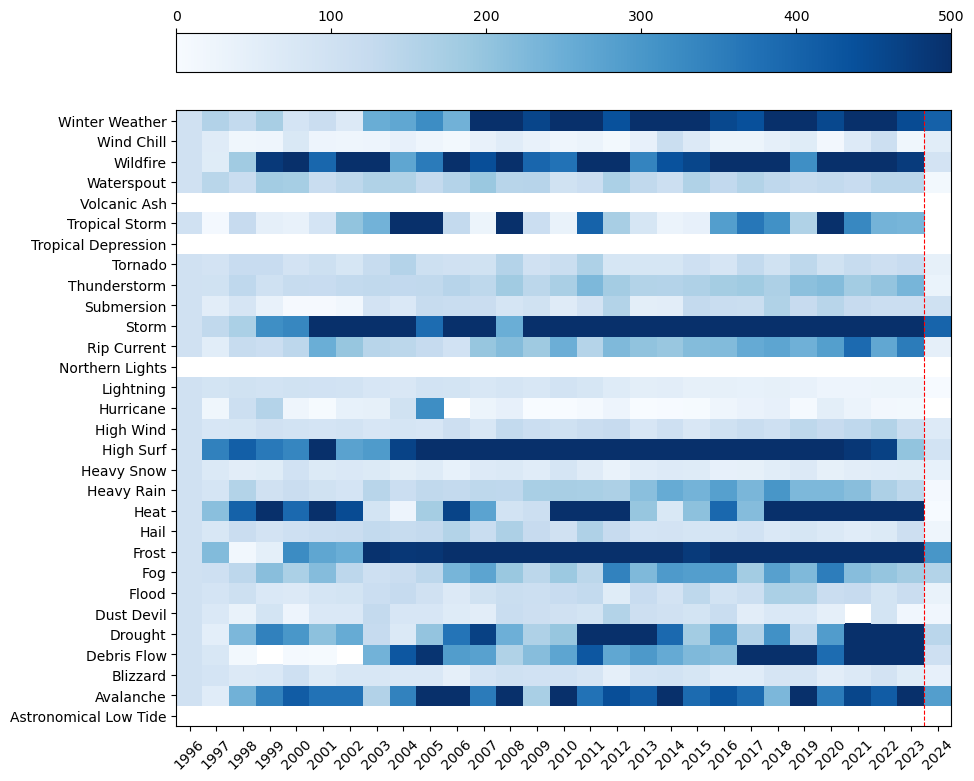

In [9]:
## Plotting the number of events

plt.figure(figsize=(10,10))
plt.pcolor(event_count.T, vmin = 0, vmax = 500, cmap = "Blues")#, norm = LogNorm(vmin = event_count.min(axis = None), vmax = event_count.max(axis = None)))
plt.xticks(ticks = 0.5+np.arange(len(event_count.index)), labels = event_count.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(event_count.columns)), labels = event_count.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(event_count.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Analysing the cost of the events

In [10]:
storm_data.columns

Index(['EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME',
       'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'BEGIN_DATE', 'END_DATE', 'DAMAGE_PROPERTY_ORIGINAL',
       'DAMAGE_CROPS_ORIGINAL', 'INFLATION_INDEX', 'US_FIPS', 'lat', 'long',
       'X_CART', 'Y_CART', 'DISCOUNT_DAMAGE_PROPERTY', 'DISCOUNT_DAMAGE_CROPS',
       'EVENT_CAT'],
      dtype='obj

In [59]:
## Discounting the amounts to have inflation adjusted amounts
storm_data["DISCOUNT_DAMAGE_PROPERTY"] = storm_data["INFLATION_INDEX"] * storm_data["DAMAGE_PROPERTY"]
storm_data["DISCOUNT_DAMAGE_CROPS"] = storm_data["INFLATION_INDEX"] * storm_data["DAMAGE_CROPS"]

cost = storm_data.loc[(storm_data["YEAR"]>1995 )& (storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["YEAR", "EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "DISCOUNT_DAMAGE_PROPERTY")
cost.replace(to_replace = [0], value = np.nan, inplace = True) 

# Normalisation
# cost = cost/cost.iloc[0, :] * 100

In [60]:
sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = False))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)

cost = cost.T.sort_index(key = sorter)
# cost = cost.T
cost.head()


YEAR,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
EVENT_CAT,,,,,,,,,,,,,,,,,,,,,
Dust Devil,7971.509166,8525.542861,2326.628635,5833.904116,4200.410964,4320.521460,4655.432580,19935.043305,2358.489517,5807.943058,...,7440.212380,10352.619846,23790.127100,170406.423260,22050.296420,17324.545420,NaN,58463.180879,5149.990000,200.000000
Rip Current,NaN,NaN,NaN,2800.273976,NaN,43205.214601,70006.504960,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Winter Weather,19160.706969,13048.592058,31941.470527,26234.940898,5769.150835,7397.256439,6067.230430,11103.679715,39511.793795,16636.913811,...,43485.189598,62216.242902,42303.886417,85343.693063,140280.164464,29646.513769,65125.185991,31081.350237,136018.037774,83837.837838
Avalanche,33801.452294,NaN,58988.261345,10112.100468,151014.775116,7040.849787,11026.024531,10350.887870,40201.525856,263997.411717,...,NaN,1690.223648,16220.541205,NaN,193727.604265,NaN,342485.201479,NaN,91476.697375,27500.000000
Thunderstorm,144790.525771,56426.602164,269339.599360,74893.781914,54581.095002,89999.761177,71715.291121,94888.442076,46710.456279,110375.785415,...,52337.278959,38435.773232,57218.553641,45877.435146,44641.644217,34720.392697,48196.306223,35560.496287,70296.277034,17215.000000


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21188\4007521886.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  a = plt.colorbar(shrink = 1,).set_label(label = "Change in damages compared to 1996 (%)",size=ftsize)


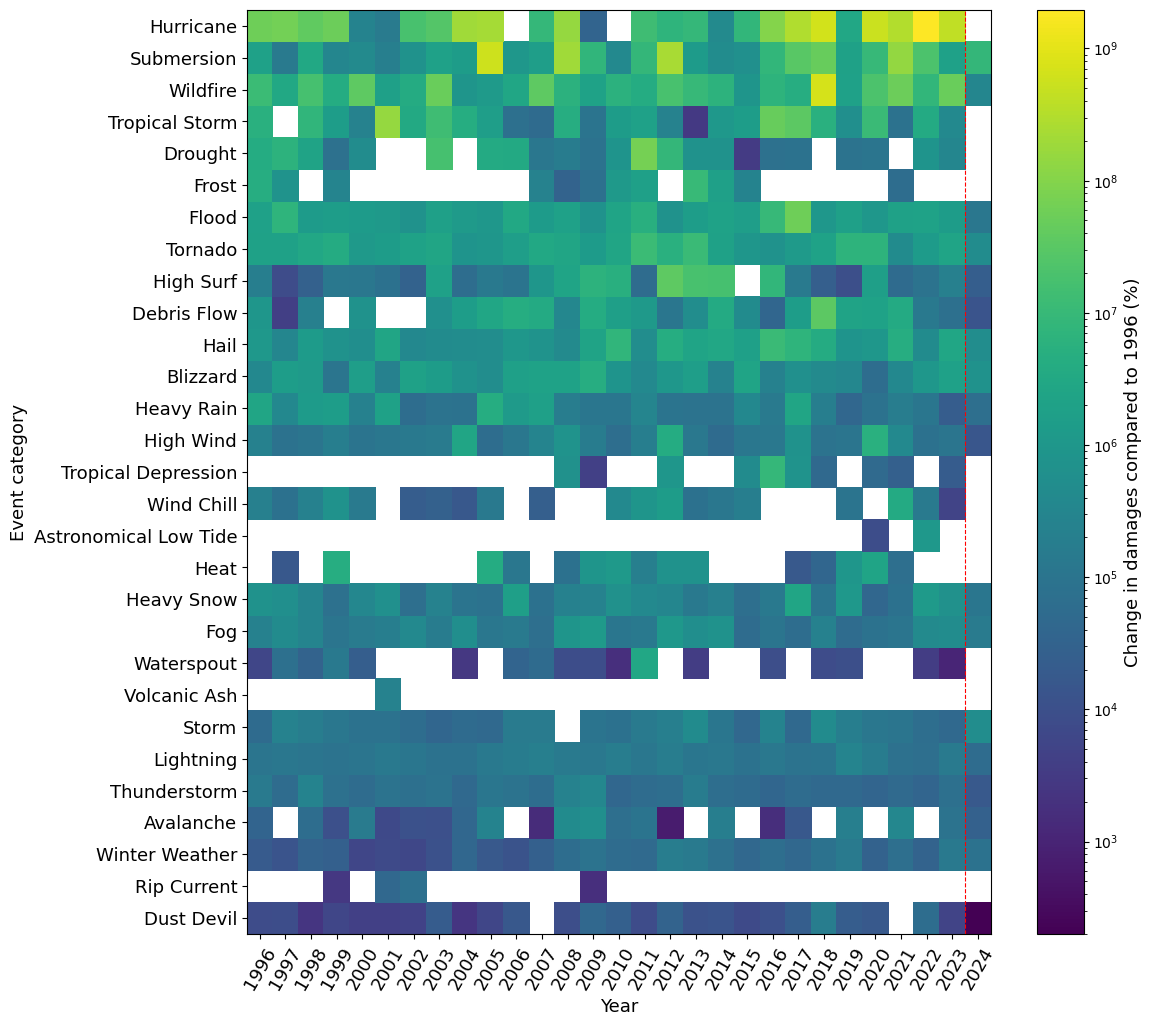

In [92]:
## Plotting the evolution of the costs with time
ftsize = 13
# plt.rcParams.update({'font.size': 10}) # changes the default fontsize of matplotlib plots
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#041734',"#9FCAE1", '#3FAAA4'], N=256) #9FCAE1

ax = plt.figure(figsize=(12,12))
plt.pcolor(cost, norm = LogNorm(vmin = cost.min(axis = None), vmax = cost.max(axis = None)))
plt.yticks(ticks = 0.5+np.arange(len(cost.index)), labels = cost.index, fontsize = ftsize)
plt.xticks(ticks = 0.5+np.arange(len(cost.columns)), labels = cost.columns, rotation = 60, fontsize = ftsize)
a = plt.colorbar(shrink = 1,).set_label(label = "Change in damages compared to 1996 (%)",size=ftsize)
plt.axvline(x = len(cost.columns)-1, c = "red", linestyle = "dashed", linewidth = 0.8)

plt.xlabel("Year", fontdict = {"size":ftsize})
plt.ylabel("Event category", fontdict = {"size":ftsize})
plt.show();

In [14]:
storm_data.loc[storm_data["EPISODE_ID"] == 174632.0].head() ## Ian Hurricane 30/09/2022

,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,...,DAMAGE_CROPS_ORIGINAL,INFLATION_INDEX,US_FIPS,lat,long,X_CART,Y_CART,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS,EVENT_CAT
1771580,174632.0,1058654,FLORIDA,12.0,2022,September,Hurricane,Z,165,COASTAL LEE,...,0.00K,1.159984,12165.0,26.5608,-81.9780,0.966881,0.378597,8.119886e+09,0.0,Hurricane
1771581,174632.0,1058657,FLORIDA,12.0,2022,September,Hurricane,Z,160,COASTAL SARASOTA,...,0.00K,1.159984,12160.0,27.0267,-82.2770,0.955394,0.389310,2.319967e+09,0.0,Hurricane
1771586,174632.0,1058664,FLORIDA,12.0,2022,September,Hurricane,Z,56,HARDEE,...,0.00K,1.159984,12056.0,27.4927,-81.8099,0.959992,0.410686,1.159984e+06,0.0,Hurricane
1772249,174632.0,1058655,FLORIDA,12.0,2022,September,Hurricane,Z,162,COASTAL CHARLOTTE,...,0.00K,1.159984,12162.0,26.9689,-82.1085,0.959583,0.389800,3.479951e+09,0.0,Hurricane
1772466,174632.0,1058666,FLORIDA,12.0,2022,September,Tropical Storm,Z,50,PINELLAS,...,0.00K,1.159984,12050.0,27.9280,-82.7220,0.936106,0.412102,5.799919e+07,0.0,Tropical Storm


### Analysis of casualties

In [15]:
storm_data["INJURIES_TOTAL"] = storm_data["INJURIES_DIRECT"] + storm_data["INJURIES_INDIRECT"]
storm_data["DEATHS_TOTAL"] = storm_data["DEATHS_DIRECT"] + storm_data["DEATHS_INDIRECT"]
injuries = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"])["INJURIES_TOTAL"].sum().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "INJURIES_TOTAL")
injuries.replace(to_replace = [0], value = np.nan, inplace = True)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21188\1857900274.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


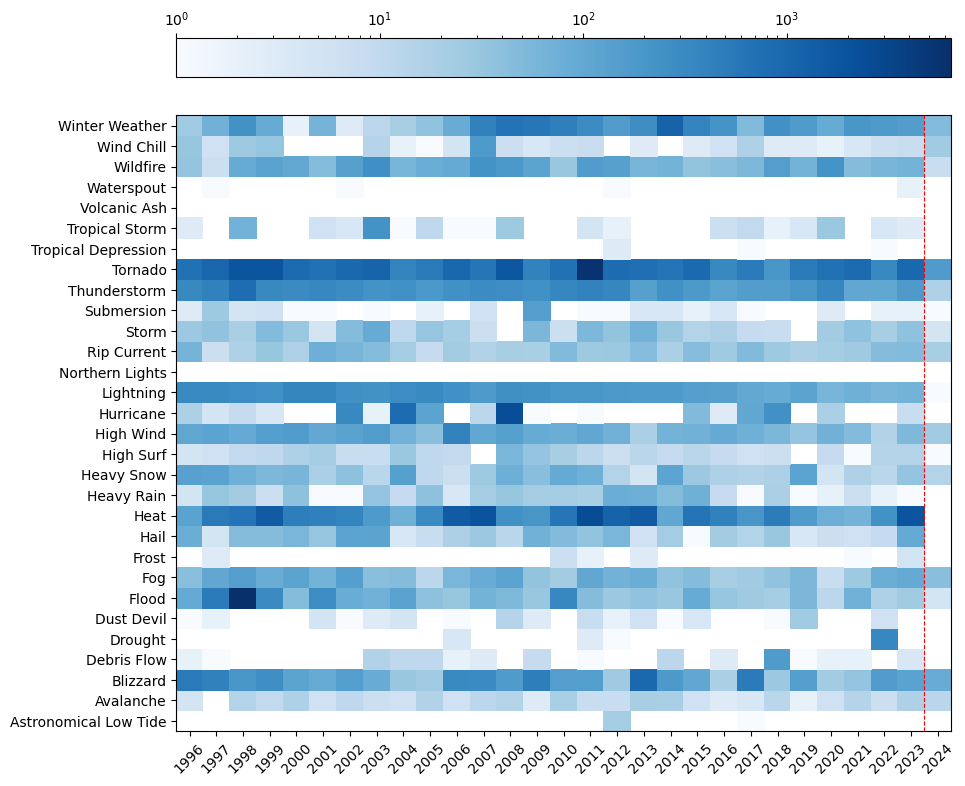

In [16]:
plt.figure(figsize=(10,10))
plt.pcolor(injuries.T, norm = LogNorm(vmin = injuries.min(axis = None), vmax = injuries.max(axis = None)), cmap = "Blues")
plt.xticks(ticks = 0.5+np.arange(len(injuries.index)), labels = injuries.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(injuries.columns)), labels = injuries.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(injuries.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Analysis of fatalities

In [17]:
deaths = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"])["DEATHS_TOTAL"].sum().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "DEATHS_TOTAL")
deaths.replace(to_replace = [0], value = np.nan, inplace = True)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21188\4283053850.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


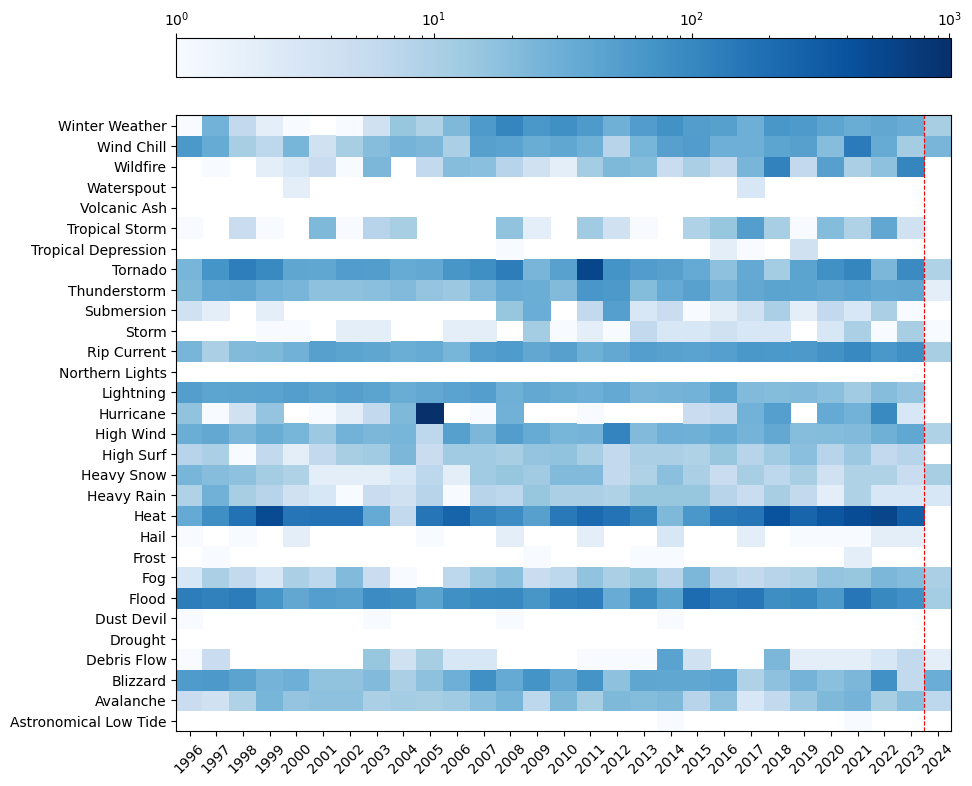

In [18]:
plt.figure(figsize=(10,10))
plt.pcolor(deaths.T, norm = LogNorm(vmin = deaths.min(axis = None), vmax = deaths.max(axis = None)), cmap = "Blues")
plt.xticks(ticks = 0.5+np.arange(len(deaths.index)), labels = deaths.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(deaths.columns)), labels = deaths.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(deaths.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Cost per type of event (damage to properties)

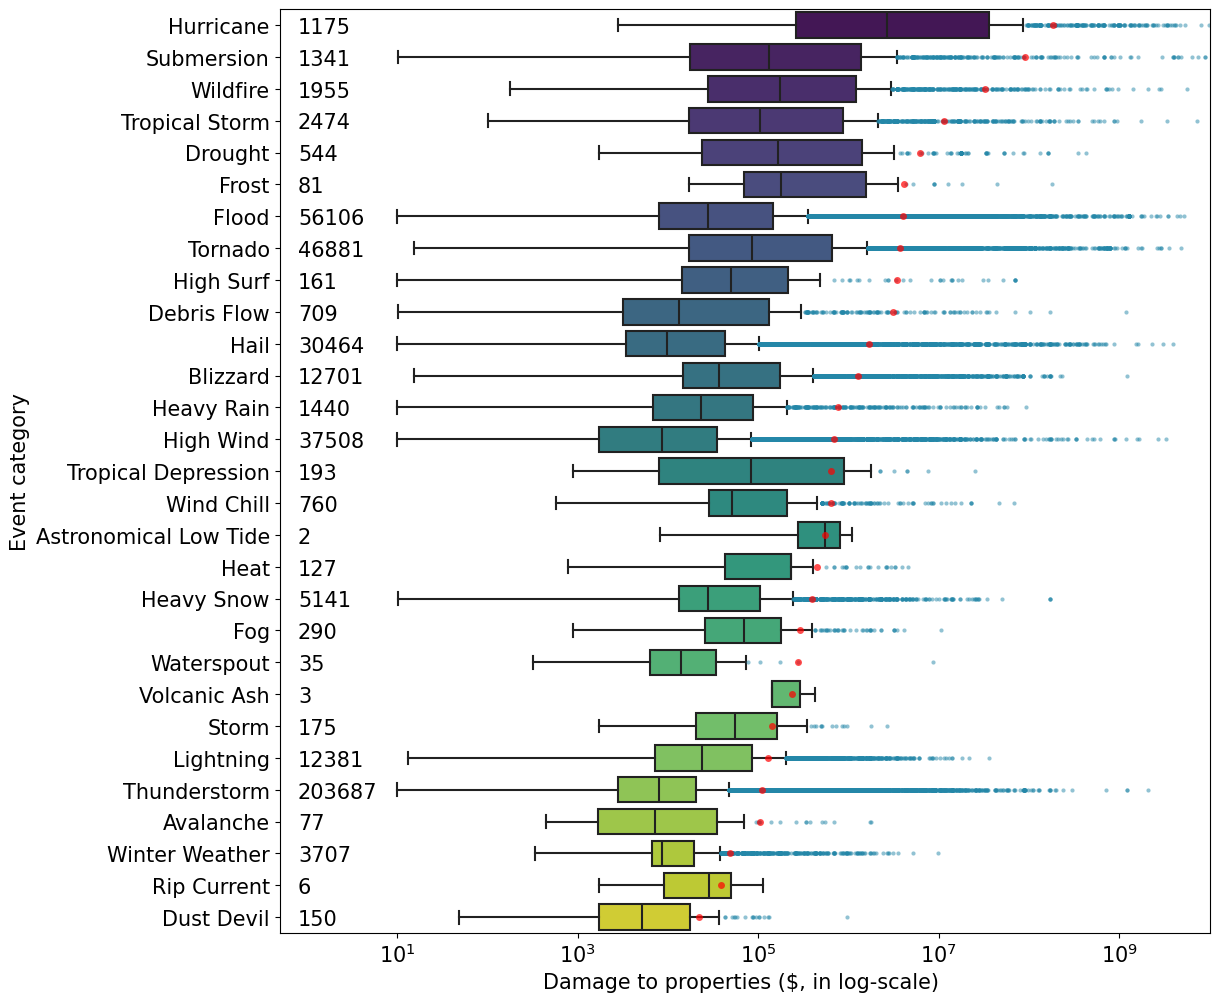

In [91]:
plt.figure(figsize=(12,12))



palette = sns.color_palette("crest_r", 30)

cmap = clr.LinearSegmentedColormap.from_list('custom blue', ["#D8F5DB", '#08316D'], N=256) #9FCAE1

sub_data = storm_data[['EVENT_CAT', "DISCOUNT_DAMAGE_PROPERTY"]].loc[storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0]

sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = True))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)


ax = sns.boxplot(x = 'DISCOUNT_DAMAGE_PROPERTY', y = 'EVENT_CAT', orient = "h",
                data = sub_data.sort_values(by = ["EVENT_CAT"], key = sorter),
                showfliers = True, 
                flierprops = dict(marker='o', markerfacecolor='#2487a8', markersize=3,
                markeredgecolor='none', alpha = 0.5),
                showmeans = True,
                meanprops = dict(marker='o', markerfacecolor='red', markersize=5,
                markeredgecolor='none', alpha = 0.7),
                palette = "viridis")


nobs = sub_data["EVENT_CAT"].value_counts()
nobs = dict(sorted(nobs.items(), key=lambda item: sort_index.index(item[0])))
nobs = [str(x) for x in list(nobs.values())]
pos = range(len(nobs))

for tick, label in zip(pos, ax.get_yticklabels()):
    ax.text(0.8, tick+0.25, nobs[tick], fontdict = {"size":15})

ax.yaxis.set_tick_params(labelsize = 15)
ax.xaxis.set_tick_params(labelsize = 15)

plt.xscale('log')
plt.xlim((0.5, 1e10))
plt.ylabel("Event category", fontdict = {"size":15})
plt.xlabel("Damage to properties ($, in log-scale) ", fontdict = {"size":15})
plt.show();

### Cost per type of event (crops)

In [90]:
2024-1996

28

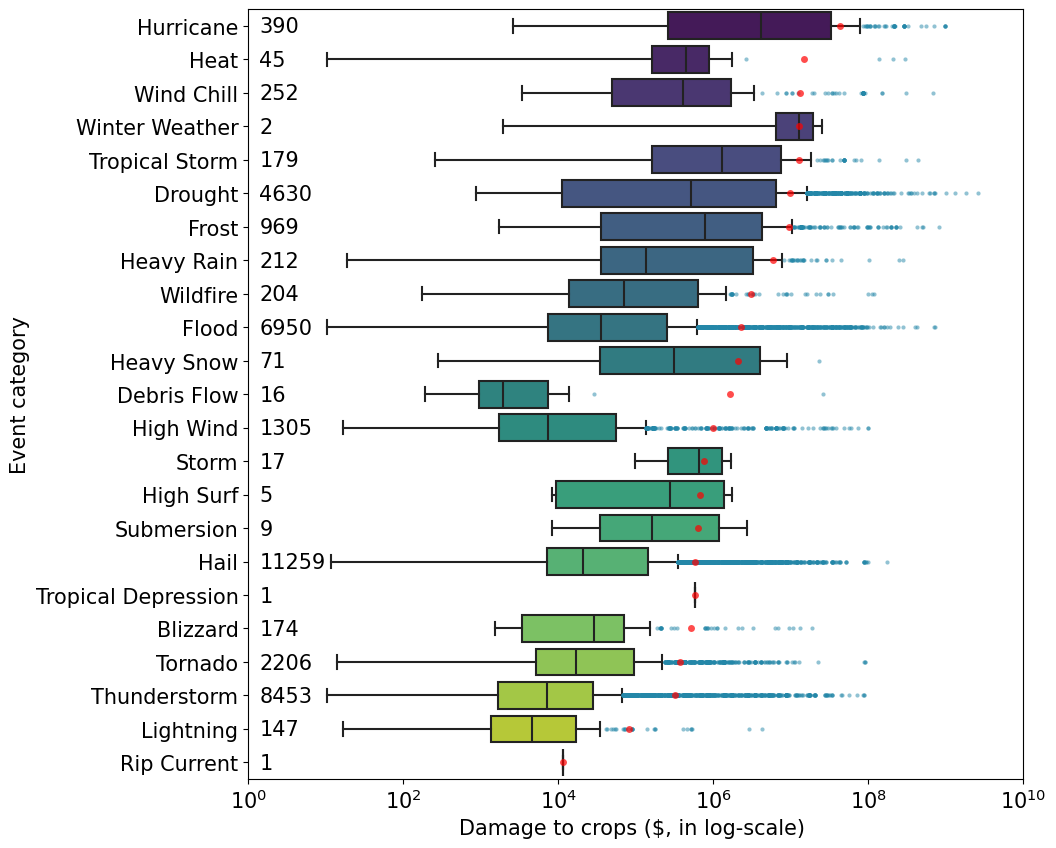

In [89]:
plt.figure(figsize=(10,10))

sub_data = storm_data[['EVENT_CAT', "DISCOUNT_DAMAGE_CROPS"]].loc[(storm_data["DISCOUNT_DAMAGE_CROPS"] != 0)]

sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_CROPS"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_CROPS"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = True))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)


ax = sns.boxplot(x = 'DISCOUNT_DAMAGE_CROPS', y = 'EVENT_CAT', orient = "h",
             data = sub_data.sort_values(by = ["EVENT_CAT"], key = sorter),
               showfliers = True, flierprops = dict(marker='o', markerfacecolor='#2487a8', markersize=3,
                  markeredgecolor='none', alpha = 0.5),
                  showmeans = True,
                  meanprops = dict(marker='o', markerfacecolor='red', markersize=5,
                  markeredgecolor='none', alpha = 0.7),
                  palette = "viridis")




nobs = sub_data["EVENT_CAT"].value_counts()
nobs = dict(sorted(nobs.items(), key=lambda item: sort_index.index(item[0])))
nobs = [str(x) for x in list(nobs.values())]
pos = range(len(nobs))

for tick, label in zip(pos, ax.get_yticklabels()):
    ax.text(1.4, tick+0.2, nobs[tick], fontdict = {"size":15})


ax.yaxis.set_tick_params(labelsize = 15)
ax.xaxis.set_tick_params(labelsize = 15)

plt.ylabel("Event category", fontdict = {"size":15})
plt.xlabel("Damage to crops ($, in log-scale) ", fontdict = {"size":15})
plt.xscale('log')
plt.xlim((1, 1e10))
plt.show();

### Geographical data

In [21]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc

from shapely.geometry import Point

In [22]:
# Localisation of the events

begin_points = storm_data.apply(
    lambda srs: Point(float(srs['long']), float(srs['lat'])),
    axis='columns'
)
begin_points

0                       POINT (-99.2 35.145)
1                       POINT (-98.6 31.815)
2          POINT (-75.58500000000001 40.615)
3                        POINT (-76.75 40.6)
4                       POINT (-79.68 41.63)
                         ...                
1891634             POINT (-103.708 41.8506)
1891635            POINT (-95.0096 29.38055)
1891636             POINT (-95.20045 30.597)
1891637            POINT (-94.8944 29.84925)
1891638                          POINT EMPTY
Length: 1891639, dtype: object

In [23]:
# Aumenting the dataset with the location of the events

storm_data_geocoded = gpd.GeoDataFrame(storm_data[['EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME','BEGIN_DATE_TIME','CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY','BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'INFLATION_INDEX', 'EVENT_CAT', 'DISCOUNT_DAMAGE_PROPERTY',
       'DISCOUNT_DAMAGE_CROPS', "lat", "long"]], geometry=begin_points)
# storm_data_geocoded = storm_data_geocoded.loc[(storm_data_geocoded["BEGIN_LAT"] == storm_data_geocoded["BEGIN_LAT"]) & (storm_data_geocoded["BEGIN_LON"] == storm_data_geocoded["BEGIN_LON"])]

storm_data_geocoded = storm_data_geocoded.loc[(storm_data_geocoded["lat"] == storm_data_geocoded["lat"]) & (storm_data_geocoded["long"] == storm_data_geocoded["long"])]

#### Visualisation of the striking points of the different events

In [36]:
storm_data_geocoded.loc[(storm_data_geocoded["EVENT_CAT"] == "Hail") & storm_data_geocoded["DISCOUNT_DAMAGE_PROPERTY"] > 0]["YEAR"].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int64)

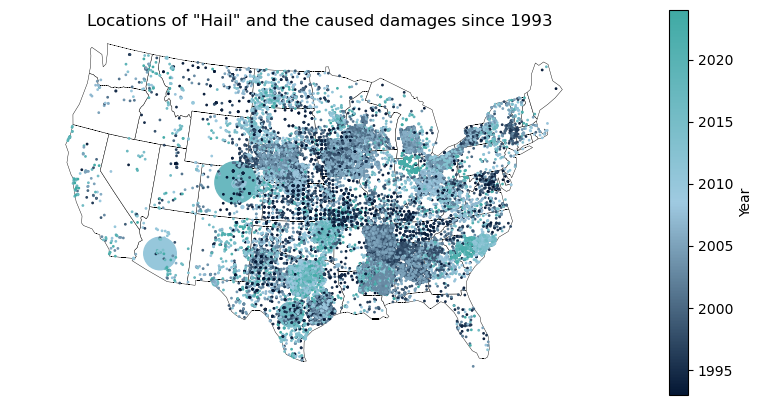

In [38]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

event_cat = "Hail"

cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#041734',"#9FCAE1", '#3FAAA4'], N=256) #9FCAE1

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(), linewidth = 0.3, facecolor='white', edgecolor ="k", figsize = (10,10))

gplt.pointplot(storm_data_geocoded.loc[(storm_data_geocoded["EVENT_CAT"] == event_cat) & (storm_data_geocoded["DISCOUNT_DAMAGE_PROPERTY"] != 0)],
                ax=ax,
                extent=contiguous_usa.total_bounds,
                projection=gcrs.AlbersEqualArea(),
                hue = "YEAR", scale = "DISCOUNT_DAMAGE_PROPERTY", legend = True, legend_var = "hue",
                legend_kwargs={"shrink": 0.5, "label": "Year"},
                limits = (1, 30), 
                cmap = cmap)


plt.title(f'Locations of "{event_cat}" and the caused damages since {storm_data_geocoded.loc[(storm_data_geocoded["EVENT_CAT"] == event_cat) & (storm_data_geocoded["DISCOUNT_DAMAGE_PROPERTY"] != 0)]["YEAR"].unique().min()}');
# Colorscaling acording to the year and size according to the extent of the damages


## Selection of the peril and visualisation of their space-time localisation

In [162]:
# storm_data_geocoded.groupby("EVENT_CAT").value_counts()

storm_data_geocoded.value_counts("EVENT_CAT")

EVENT_CAT
Thunderstorm             558637
Hail                     402535
Flood                    164923
Blizzard                 105639
High Wind                105522
Tornado                   76742
Winter Weather            74222
Drought                   69631
Heavy Snow                65237
Heat                      43655
Wind Chill                31612
Heavy Rain                29374
Lightning                 17662
Fog                       14639
Frost                     12867
Wildfire                   7364
Tropical Storm             5687
High Surf                  5400
Waterspout                 5108
Submersion                 5006
Debris Flow                1715
Hurricane                  1558
Rip Current                1265
Storm                      1226
Avalanche                   578
Astronomical Low Tide       522
Tropical Depression         452
Dust Devil                  234
Volcanic Ash                 17
Northern Lights               8
Name: count, dtype: int64

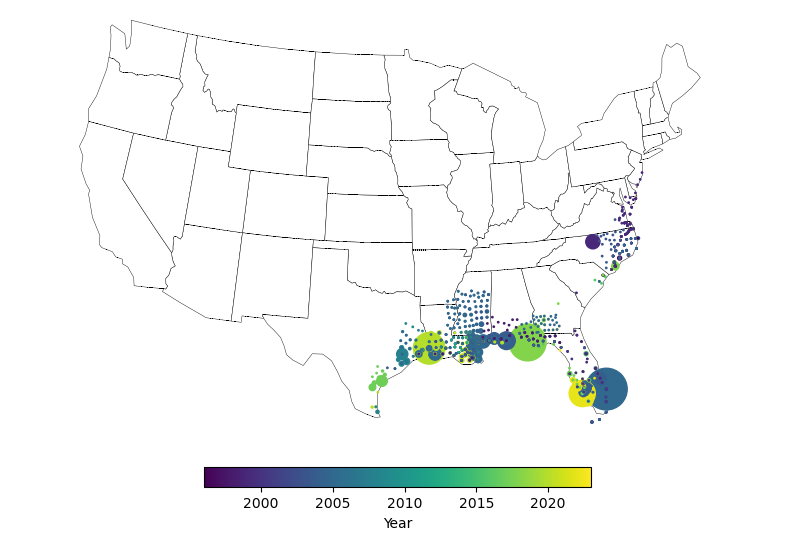

In [222]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)


cmap = clr.LinearSegmentedColormap.from_list('custom', ['#0014fb', '#fb0000'], N=256) #9FCAE1

event_cat = "Hurricane"

sub_data = storm_data_geocoded.loc[((storm_data_geocoded["EVENT_CAT"] == event_cat)) & # |
                                    (storm_data_geocoded["DISCOUNT_DAMAGE_PROPERTY"] != 0)]
# sub_data["DISCOUNT_DAMAGE_PROPERTY"] = np.log(sub_data["DISCOUNT_DAMAGE_PROPERTY"])

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(), linewidth = 0.3, facecolor='white', edgecolor ="k", figsize = (10,10))

gplt.pointplot(sub_data,
                ax=ax,
                extent=contiguous_usa.total_bounds,
                projection=gcrs.AlbersEqualArea(),
                hue = "YEAR", scale = "DISCOUNT_DAMAGE_PROPERTY", legend = True, legend_var = "hue",
                legend_kwargs={"shrink": 0.5, "label": "Year", "orientation":"horizontal", "pad":0.05},
                limits = (1, 30), 
                cmap = "viridis")


n = len(sub_data["EPISODE_ID"].unique())
# plt.title(f"Number of unique episodes of {event_cat.lower()}: {n}")


In [195]:
episode_data = storm_data_geocoded.groupby("EPISODE_ID").aggregate({"EVENT_CAT": "first", "YEAR": "mean","DISCOUNT_DAMAGE_PROPERTY": "sum", "lat": "mean", "long": "mean"})

In [196]:
episode_sub_data = episode_data.loc[(episode_data["EVENT_CAT"] == event_cat) & (episode_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)]

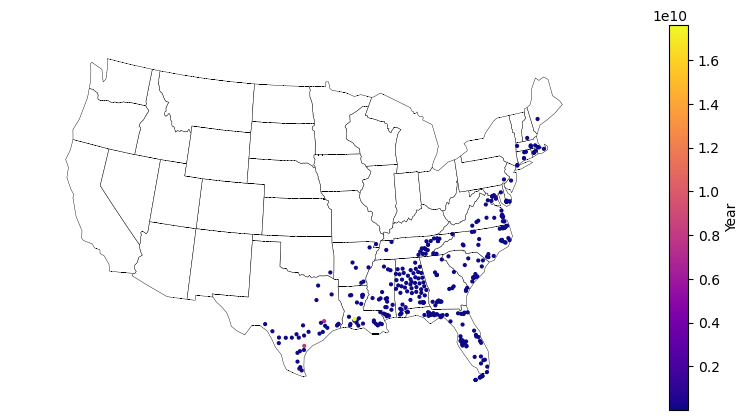

In [197]:
points = episode_sub_data.apply(
    lambda srs: Point(float(srs['long']), float(srs['lat'])),
    axis='columns'
)

episode_sub_data = gpd.GeoDataFrame(episode_sub_data, geometry = points)
# episode_sub_data["DISCOUNT_DAMAGE_PROPERTY"] = np.log10(episode_sub_data["DISCOUNT_DAMAGE_PROPERTY"])

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(), linewidth = 0.3, facecolor='white', edgecolor ="k", figsize = (10,10))

gplt.pointplot(episode_sub_data,
                ax=ax,
                extent=contiguous_usa.total_bounds,
                projection=gcrs.AlbersEqualArea(),
                hue = "DISCOUNT_DAMAGE_PROPERTY", s = 2, legend = True, legend_var = "hue",
                legend_kwargs={"shrink": 0.5, "label": "Year"},
                limits = (1, 30),
                cmap = "plasma")

n = episode_sub_data.shape[0]
# plt.title(f"Number of unique episode of {event_cat.lower()}: {n}");


## Draft space

In [167]:
storm_data_episode = storm_data.groupby(["EPISODE_ID", "STATE", "YEAR", "MONTH_NAME", "EVENT_CAT", "CZ_NAME", "US_FIPS", "lat", "long"])[["DEATHS_TOTAL", "INJURIES_TOTAL", "DISCOUNT_DAMAGE_PROPERTY", "DISCOUNT_DAMAGE_CROPS"]].sum().reset_index()

In [168]:
storm_data_episode.sort_values(by ="YEAR", ascending= True)

,EPISODE_ID,STATE,YEAR,MONTH_NAME,EVENT_CAT,CZ_NAME,US_FIPS,lat,long,DEATHS_TOTAL,INJURIES_TOTAL,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS
1514453,990000001.0,FLORIDA,1972,June,Tornado,OKEECHOBEE,12093,27.240000,-80.800000,6,44,1.644999e+06,0.000000
1514452,990000001.0,FLORIDA,1972,June,Tornado,HENDRY,12051,26.750000,-81.475000,1,1,3.289999e+04,16449.993692
1514451,990000001.0,FLORIDA,1972,June,Tornado,GLADES,12043,26.775000,-81.480000,0,6,6.250998e+05,16449.993692
1394078,2052106.0,OKLAHOMA,1996,August,Lightning,OKLAHOMA,40109,35.554611,-97.409401,0,0,9.295399e+04,0.000000
1386587,2045758.0,TEXAS,1996,April,Drought,AUSTIN,48211,29.887000,-96.278000,0,0,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006218,188034.0,CALIFORNIA,2024,January,Flood,MARIN,6041,38.021450,-122.539600,0,0,0.000000e+00,0.000000
1006219,188034.0,CALIFORNIA,2024,January,Flood,MONTEREY,6053,36.645450,-121.576450,0,0,0.000000e+00,0.000000
1006220,188034.0,CALIFORNIA,2024,January,Flood,MONTEREY,6053,36.665450,-121.550000,0,0,0.000000e+00,0.000000
1006209,188030.0,CALIFORNIA,2024,February,Flood,SONOMA,6097,38.595350,-123.345900,0,0,0.000000e+00,0.000000


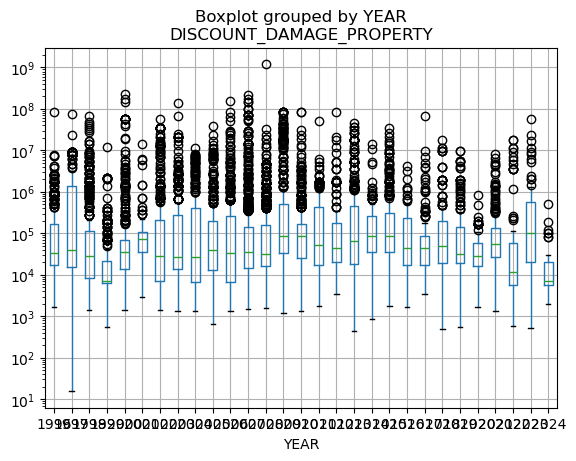

In [169]:
storm_data_episode.loc[(storm_data_episode["EVENT_CAT"] == "Blizzard") & (storm_data_episode["DISCOUNT_DAMAGE_PROPERTY"] != 0)].boxplot(column = "DISCOUNT_DAMAGE_PROPERTY", by = "YEAR", showfliers = True)
plt.yscale("log")

In [170]:
storm_data_episode[["EPISODE_ID", "STATE"]].drop_duplicates()["EPISODE_ID"].astype(str).describe()

count        356605
unique       356600
top       2061187.0
freq              2
Name: EPISODE_ID, dtype: object

In [171]:
storm_data_episode[storm_data_episode["EPISODE_ID"] == 2043604.0]

,EPISODE_ID,STATE,YEAR,MONTH_NAME,EVENT_CAT,CZ_NAME,US_FIPS,lat,long,DEATHS_TOTAL,INJURIES_TOTAL,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS
1384260,2043604.0,MARYLAND,1996,July,Tornado,MONTGOMERY,24031,39.075,-77.35,0,0,0.000000,8450.363074
1384261,2043604.0,VIRGINIA,1996,July,Tornado,LOUDOUN,51107,39.070,-77.35,0,0,8450.363074,0.000000


In [172]:
storm_data.columns

Index(['EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME',
       'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'DAMAGE_PROPERTY_ORIGINAL', 'DAMAGE_CROPS_ORIGINAL', 'INFLATION_INDEX',
       'US_FIPS', 'lat', 'long', 'EVENT_CAT', 'X_CART', 'Y_CART', 'Z_CART',
       'DISCOUNT_DAMAGE_PROPERTY', 'DISCOUNT_DAMAGE_CROPS', 'INJURIES_TOTAL',
       'DEATHS_TOTAL']

### Wildfires

In [173]:
storm_data.loc[(storm_data["EVENT_CAT"] == "Wildfire") & (storm_data["MAGNITUDE"] == storm_data["MAGNITUDE"])][["EPISODE_ID","EVENT_ID", "YEAR", "STATE", "CZ_FIPS", "DISCOUNT_DAMAGE_PROPERTY", "DISCOUNT_DAMAGE_CROPS", "MAGNITUDE"]]

,EPISODE_ID,EVENT_ID,YEAR,STATE,CZ_FIPS,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS,MAGNITUDE
234819,2403384.0,5540551,1996,KANSAS,177,4.225182e+05,0.0,35.0
241589,2032318.0,5544033,1996,ALASKA,18,1.690073e+07,0.0,32.0
276077,2055579.0,5576435,1996,CALIFORNIA,73,6.320872e+07,0.0,45.0
433530,1093507.0,5141781,2000,COLORADO,3,0.000000e+00,0.0,5000.0
436057,1093507.0,5141780,2000,COLORADO,41,0.000000e+00,0.0,800.0
522170,1146379.0,5324743,2002,CALIFORNIA,39,3.080286e+04,0.0,420.0
542532,1135793.0,5298896,2002,ARIZONA,25,0.000000e+00,0.0,2.2
542549,1134607.0,5296517,2002,CALIFORNIA,19,2.100195e+04,0.0,400.0
542550,1134608.0,5296518,2002,CALIFORNIA,29,2.730254e+06,0.0,3430.0
542917,1134606.0,5296516,2002,CALIFORNIA,29,1.540143e+05,0.0,498.0


In [176]:
  import pyproj

# Define the Albers Equal-Area projection
albers_equal_area = pyproj.Proj(proj='aea', lat_1=29.5, lat_2=45.5, lat_0=23, lon_0=-96, datum='WGS84')

# Function to convert lat/lon to Cartesian coordinates using the Albers Equal-Area projection
def latlon_to_cartesian(lat, lon):
    x, y = albers_equal_area(lon, lat)
    return x, y

# Example usage
latitude = np.array([40.7128,40.7128])   # Latitude for New York City
longitude = np.array([-74.0060, -74.0060])  # Longitude for New York City

x, y = latlon_to_cartesian(latitude, longitude)
print(f"Cartesian coordinates: x={x}, y={y}")

Cartesian coordinates: x=[1826303.96884292 1826303.96884292], y=[2179112.02663545 2179112.02663545]


In [177]:
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

In [180]:
collisions.columns

Index(['id', 'ON STREET NAME', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 3', 'NUMBER OF CYCLIST INJURED',
       'LONGITUDE', 'OFF STREET NAME', 'VEHICLE TYPE CODE 4', 'LATITUDE',
       'LOCATION', 'VEHICLE TYPE CODE 1', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 2', 'NUMBER OF PEDESTRIANS KILLED',
       'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'VEHICLE TYPE CODE 2',
       'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1', 'ZIP CODE',
       'VEHICLE TYPE CODE 3', 'NUMBER OF CYCLIST KILLED', 'DATE', 'UNIQUE KEY',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 5', 'TIME',
       'NUMBER OF PEDESTRIANS INJURED', 'geometry'],
      dtype='object')

## USA mesh

In [3]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

In [4]:
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [5]:
contiguous_usa["state"].sort_values()

27                 Alabama
5                  Arizona
13                Arkansas
6               California
7                 Colorado
22             Connecticut
41                Delaware
42    District of Columbia
28                 Florida
29                 Georgia
3                    Idaho
32                Illinois
33                 Indiana
14                    Iowa
15                  Kansas
34                Kentucky
20               Louisiana
47                   Maine
43                Maryland
23           Massachusetts
48                Michigan
0                Minnesota
30             Mississippi
16                Missouri
1                  Montana
17                Nebraska
8                   Nevada
24           New Hampshire
44              New Jersey
9               New Mexico
45                New York
35          North Carolina
2             North Dakota
36                    Ohio
18                Oklahoma
10                  Oregon
46            Pennsylvania
2

In [32]:
geo_data = gpd.read_file("../Data/US_map/USA.geo.json")

In [43]:
geo_data = geo_data.loc[(geo_data['NAME'] != "Alaska") & (geo_data['NAME'] != "Puerto Rico") & (geo_data['NAME'] != "Hawaii")]

In [44]:
geo_data["COUNTRY"] = "USA"
us_borders = geo_data.dissolve(by = "COUNTRY")

<Axes: >

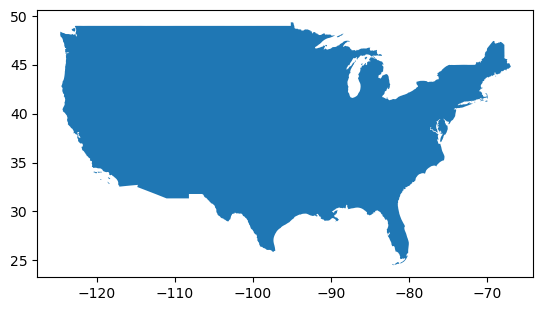

In [45]:
us_borders.plot()

In [6]:
contiguous_usa["COUNTRY"] = "USA"
contiguous_usa = contiguous_usa.dissolve(by = "COUNTRY")

<Axes: >

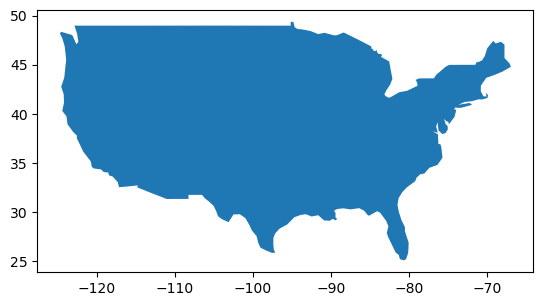

In [7]:
contiguous_usa.plot()

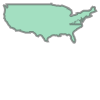

In [13]:
contiguous_usa.geometry[0]

In [19]:
usa_polygon = contiguous_usa.geometry[0]
min_x, min_y, max_x, max_y = usa_polygon.bounds

# Define grid spacing (adjust as needed)
spacing = .5 # degree spacing for grid points

# Generate grid of points within the bounding box
x_coords = np.arange(np.floor(min_x), np.ceil(max_x), spacing)
y_coords = np.arange(np.floor(min_y), np.ceil(max_y), spacing)

grid_points = []
for x in x_coords:
    for y in y_coords:
        point = Point(x, y)
        if usa_polygon.contains(point):
            grid_points.append((point.x, point.y))

# Create a DataFrame from grid points
grid_df = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in grid_points])

c:\Users\Utilisateur\anaconda3\Lib\site-packages\geopandas\geoseries.py:648: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


In [23]:
grid_points

[(-124.5, 48.0),
 (-124.0, 40.0),
 (-124.0, 40.5),
 (-124.0, 41.0),
 (-124.0, 41.5),
 (-124.0, 42.0),
 (-124.0, 42.5),
 (-124.0, 43.0),
 (-124.0, 43.5),
 (-124.0, 44.0),
 (-124.0, 44.5),
 (-124.0, 46.5),
 (-124.0, 47.0),
 (-124.0, 47.5),
 (-124.0, 48.0),
 (-123.5, 39.0),
 (-123.5, 39.5),
 (-123.5, 40.0),
 (-123.5, 40.5),
 (-123.5, 41.0),
 (-123.5, 41.5),
 (-123.5, 42.0),
 (-123.5, 42.5),
 (-123.5, 43.0),
 (-123.5, 43.5),
 (-123.5, 44.0),
 (-123.5, 44.5),
 (-123.5, 45.0),
 (-123.5, 45.5),
 (-123.5, 46.0),
 (-123.5, 46.5),
 (-123.5, 47.0),
 (-123.5, 47.5),
 (-123.5, 48.0),
 (-123.0, 38.5),
 (-123.0, 39.0),
 (-123.0, 39.5),
 (-123.0, 40.0),
 (-123.0, 40.5),
 (-123.0, 41.0),
 (-123.0, 41.5),
 (-123.0, 42.0),
 (-123.0, 42.5),
 (-123.0, 43.0),
 (-123.0, 43.5),
 (-123.0, 44.0),
 (-123.0, 44.5),
 (-123.0, 45.0),
 (-123.0, 45.5),
 (-123.0, 46.0),
 (-123.0, 46.5),
 (-123.0, 47.0),
 (-123.0, 47.5),
 (-122.5, 37.5),
 (-122.5, 38.0),
 (-122.5, 38.5),
 (-122.5, 39.0),
 (-122.5, 39.5),
 (-122.5, 40.0

In [127]:
from shapely import Polygon, MultiPolygon

def extract_points(geometry):
    if isinstance(geometry, Polygon):
        return list(geometry.exterior.coords)
    elif isinstance(geometry, MultiPolygon):
        points = []
        for polygon in geometry.geoms:
            points.extend(list(polygon.exterior.coords[:-1]))
        return points
    else:
        return []
    
all_points = []

for geometry in contiguous_usa.geometry:
    points = extract_points(geometry)
    all_points.extend(points)
unique_points = list(set(all_points))


longitude = [point[0] for point in all_points]
latitude = [point[1] for point in all_points]

boundaries_mesh = pd.DataFrame({"long": longitude, "lat": latitude})

In [128]:
boundaries_mesh

,long,lat
0,-95.600180,28.738556
1,-96.593943,28.307291
2,-97.140034,27.829981
3,-97.370227,27.380190
4,-97.379761,26.690154
...,...,...
281,-92.499060,29.552300
282,-93.226370,29.783750
283,-93.848420,29.713630
284,-94.690003,29.479932


In [126]:
boundaries_mesh.to_csv("../Data/US_map/boundaries_US_mesh.csv")

In [129]:
points = boundaries_mesh.apply(
    lambda srs: Point(float(srs['long']), float(srs['lat'])),
    axis='columns'
)

boundaries = gpd.GeoDataFrame(boundaries_mesh, geometry=points)

<Axes: >

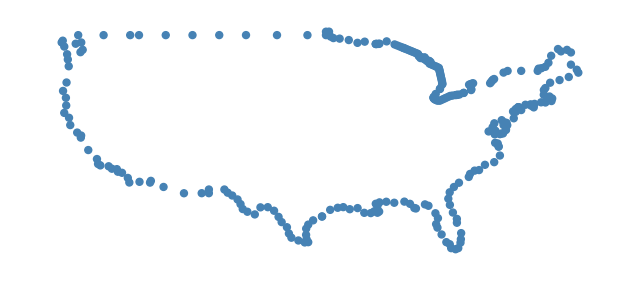

In [137]:
gplt.pointplot(boundaries)

In [8]:
import pyproj

albers_equal_area = pyproj.Proj(proj='aea', lat_1=29.5, lat_2=45.5, lat_0=24, lon_0=-124, datum='WGS84')
x, y = albers_equal_area(-124, 24)
x, y


(0.0, 0.0)

In [15]:
max_coord = albers_equal_area(-68, 49)

In [16]:
max_coord

(3912894.3292881106, 3966785.152630954)

(222223.77771563333, 2782861.3204044052)

(0.0, 0.0)

In [104]:
states_mapping = pd.read_csv("../Data/mapping_tables/US_STATE.csv")
states_mapping.head()

,State,Abbreviation,FIPS,Region,Clim_Region
0,Alabama,AL,1,South,Southeast
1,Alaska,AK,2,West Coast,NaN
2,Arizona,AZ,4,West Coast,Southwest
3,Arkansas,AR,5,South,South
4,California,CA,6,West Coast,West


In [108]:
contiguous_usa.head()

,State,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [109]:
test = contiguous_usa.join(states_mapping[["State", "Region", "Clim_Region"]].set_index("State"), on  = "State")

<GeoAxes: >

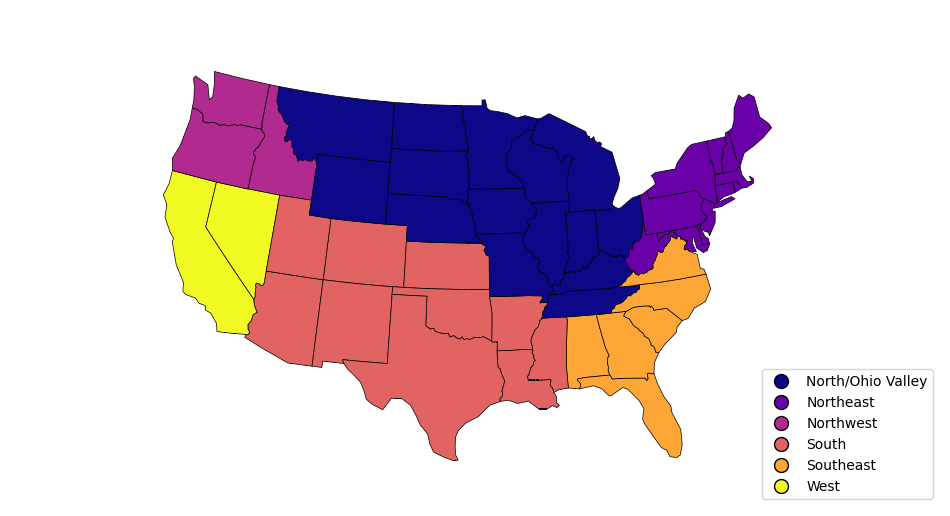

In [160]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path).rename(columns = {"state":"State"})
states_mapping = pd.read_csv("../Data/mapping_tables/US_STATE.csv")

states_mapping["New_reg"] = np.where((states_mapping["Clim_Region"] == "South") | (states_mapping["Clim_Region"] == "Southwest"), "South", states_mapping["Clim_Region"])
states_mapping["New_reg"] = np.where((states_mapping["Clim_Region"] == "Northern Rockies and Plains") | (states_mapping["Clim_Region"] == "Upper Midwest") | (states_mapping["Clim_Region"] == "Ohio Valley"), "North/Ohio Valley", states_mapping["New_reg"])

contiguous_usa = contiguous_usa.join(states_mapping[["State", "Region", "Clim_Region", "New_reg"]].set_index("State"), on  = "State")

gplt.choropleth(
    contiguous_usa, hue='New_reg', projection=gcrs.AlbersEqualArea(),
    cmap='plasma', legend=True, edgecolor = "black", linewidth = 0.5,
    figsize = (12,12), legend_kwargs={'loc': 'lower right'}
)

<GeoAxes: >

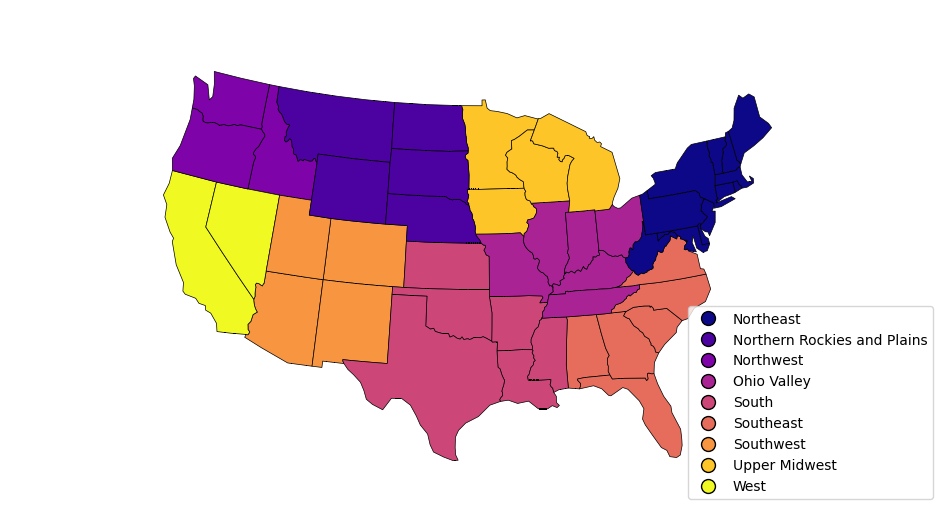

In [130]:
gplt.choropleth(
    contiguous_usa, hue='Clim_Region', projection=gcrs.AlbersEqualArea(),
    cmap='plasma', legend=True, edgecolor = "black", linewidth = 0.5,
    figsize = (12,12),legend_kwargs={'loc': 'lower right'}
)

In [159]:
states_mapping.to_csv("../Data/mapping_tables/US_STATE.csv")

In [152]:
states_mapping["New_reg"] = np.where((states_mapping["Clim_Region"] == "South") | (states_mapping["Clim_Region"] == "Southwest"), "South", states_mapping["Clim_Region"])
states_mapping["New_reg"] = np.where((states_mapping["Clim_Region"] == "Northern Rockies and Plains") | (states_mapping["Clim_Region"] == "Upper Midwest") | (states_mapping["Clim_Region"] == "Ohio Valley"), "North/Ohio Valley", states_mapping["Clim_Region"])

In [153]:
states_mapping

,State,Abbreviation,FIPS,Region,Clim_Region,New_reg
0,Alabama,AL,1,South,Southeast,Southeast
1,Alaska,AK,2,West Coast,NaN,NaN
2,Arizona,AZ,4,West Coast,Southwest,Southwest
3,Arkansas,AR,5,South,South,South
4,California,CA,6,West Coast,West,West
5,Colorado,CO,8,Center,Southwest,Southwest
6,Connecticut,CT,9,East Coast,Northeast,Northeast
7,Delaware,DE,10,East Coast,Northeast,Northeast
8,District of Columbia,DC,11,East Coast,Northeast,Northeast
9,Florida,FL,12,East Coast,Southeast,Southeast
